* Dates:
    * Older moves might not be torrented
    * Month: Blockbusters are released in May and December, No good movies released January - April, Kids are on summer cvaction during summer months.
* Production Budget: 
    * Might be outliers. Take log if outliers, Remove outliers, Create new feature that is binning production budget
* Rating: Is there a relationship with Number of torrents, look at mean, median torrents per rating. Maybe group ratings together for example G, PG, PG-13 in one group R in another
* Genre as a feature. Maybe keep a subset maybe create new ratings by combing other ratings

In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='bbiggs', api_key='jrgs2lfv3u')
import seaborn as sns

# Read in TRAIN data set and select pertinent columns

In [2]:
df = pd.read_csv('data/train_data2.csv', encoding='latin-1')
print(len(df))
df.head()

1324


,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Game,50000000,1997-09-12,1997.0,9.0,R,129,"Drama, Mystery, Thriller",David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",276.0
1,Speed,30000000,1994-06-10,1994.0,6.0,R,116,"Action, Adventure, Crime",Jan de Bont,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",241.0
2,The Man in the Iron Mask,35000000,1998-03-13,1998.0,3.0,PG-13,132,"Action, Adventure",Randall Wallace,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",95.0
3,Hide & Seek,25000000,2005-01-28,2005.0,1.0,R,101,"Drama, Horror, Thriller",John Polson,"Robert De Niro, Dakota Fanning, Famke Janssen,...",89.0
4,The Three Stooges,30000000,2012-04-13,2012.0,4.0,PG,92,Comedy,"Bobby Farrelly, Peter Farrelly","Sean Hayes, Will Sasso, Chris Diamantopoulos, ...",230.0


# Convert dates to datetime objects

In [3]:
df['Released'] = pd.to_datetime(df['Released'])
df['Year'] = pd.DatetimeIndex(df['Released']).year
df['Month'] = pd.DatetimeIndex(df['Released']).month
df.head()

,Title,Prod_Budget,Released,Year,Month,Rated,Runtime,Genre,Director,Actors,Total_Torrents
0,The Game,50000000,1997-09-12,1997,9,R,129,"Drama, Mystery, Thriller",David Fincher,"Michael Douglas, Sean Penn, Deborah Kara Unger...",276.0
1,Speed,30000000,1994-06-10,1994,6,R,116,"Action, Adventure, Crime",Jan de Bont,"Keanu Reeves, Dennis Hopper, Sandra Bullock, J...",241.0
2,The Man in the Iron Mask,35000000,1998-03-13,1998,3,PG-13,132,"Action, Adventure",Randall Wallace,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",95.0
3,Hide & Seek,25000000,2005-01-28,2005,1,R,101,"Drama, Horror, Thriller",John Polson,"Robert De Niro, Dakota Fanning, Famke Janssen,...",89.0
4,The Three Stooges,30000000,2012-04-13,2012,4,PG,92,Comedy,"Bobby Farrelly, Peter Farrelly","Sean Hayes, Will Sasso, Chris Diamantopoulos, ...",230.0


# Inspect years

In [4]:
df['Year'].describe().astype(int)

count    1324
mean     2003
std         9
min      1966
25%      1999
50%      2005
75%      2010
max      2016
Name: Year, dtype: int64

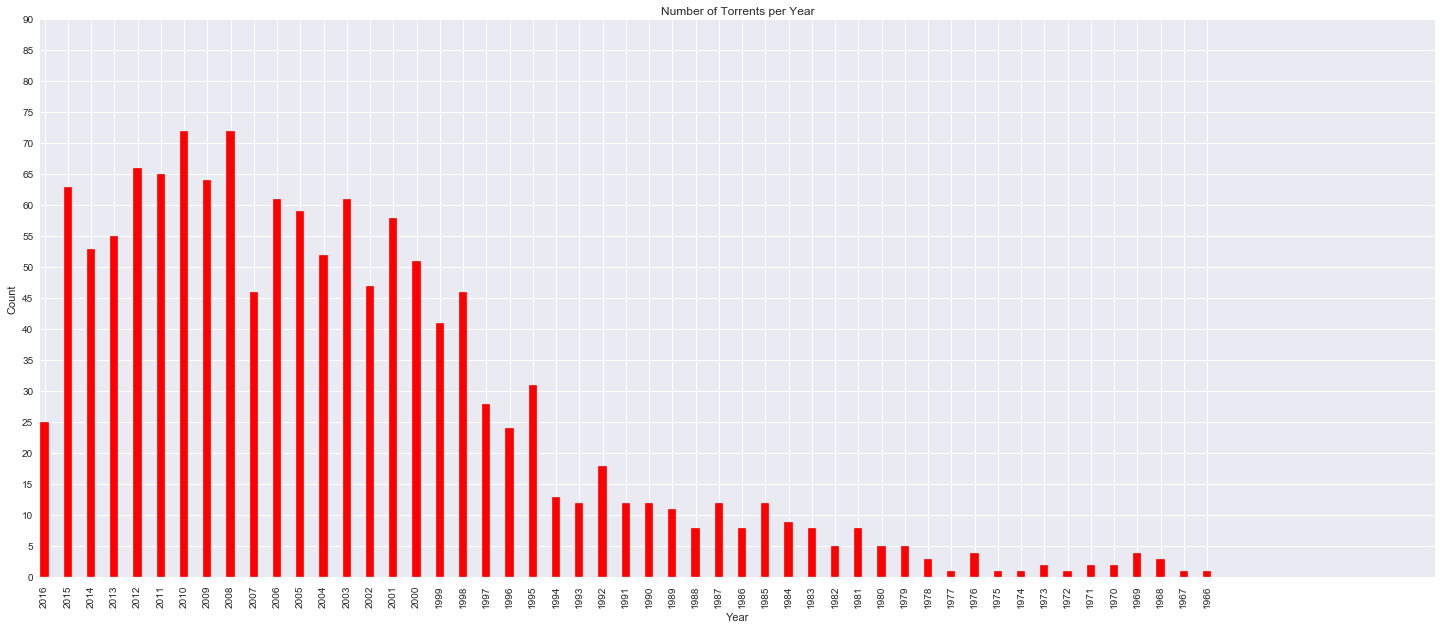

In [5]:
# dictionary - year counts
yr_dict = df['Year'].value_counts().to_dict()

import operator
yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]

# plot histogram
plt.figure(figsize=(25,10))
ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

# df => df_yr 

In [6]:
# cut off at year 
before = len(df)
yr_cut_bot = 1998
yr_cut_top = 2015
mask = (df['Year'] >= yr_cut_bot) & (df['Year'] < yr_cut_top)
df_yr = df.loc[mask]
df_yr.sort_values('Year').head()
after = len(df_yr)

print('{0} entries lost ({1}%) due to date cutoff between {2} and {3}'.format(before-after, 
                                                round((before/after)/before *100, 2), yr_cut_bot, yr_cut_top))

355 entries lost (0.1%) due to date cutoff between 1998 and 2015


In [7]:
# 1998
mask =  (df_yr['Year'] == 1998) & (df_yr['Total_Torrents'] > 100)
df_yr = df_yr[~mask]

# 1999
mask =  (df_yr['Year'] >= 1999 & <= 2001) & (df_yr['Total_Torrents'] > 200)
df_yr = df_yr[~mask]

# 2000
mask =  (df_yr['Year'] == 2000) & (df_yr['Total_Torrents'] > 200)
df_yr = df_yr[~mask]

# 2001
mask =  (df_yr['Year'] == 2001) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2002
mask =  (df_yr['Year'] == 2002) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2003
mask =  (df_yr['Year'] == 2003) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2004
# 2005
mask =  (df_yr['Year'] == 2005) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2006
mask =  (df_yr['Year'] == 2006) & (df_yr['Total_Torrents'] > 300)
df_yr = df_yr[~mask]

# 2007
mask =  (df_yr['Year'] == 2007) & (df_yr['Total_Torrents'] > 450)
df_yr = df_yr[~mask]

# 2010
mask =  (df_yr['Year'] == 2010) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

# 2014
mask =  (df_yr['Year'] == 2014) & (df_yr['Total_Torrents'] > 850)
df_yr = df_yr[~mask]

SyntaxError: invalid syntax (<ipython-input-7-e1410871c488>, line 6)

In [ ]:
import seaborn as sns
sns.set(style="ticks", context="talk")

# Load the example tips dataset
#df_sub = df_yr[df_yr['Year'] == 2014]

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="Prod_Budget", y="Total_Torrents", hue="Month", data=df_sub,
               palette=pal, size=7)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Production Budget ($)", "Total Torrents")

In [ ]:
# 1
mask =  (df_yr['Month'] == 1) & (df_yr['Total_Torrents'] > 500)
df_yr = df_yr[~mask]

# 3
mask =  (df_yr['Month'] == 3) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

# 4
mask =  (df_yr['Month'] == 4) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

# 5
mask =  (df_yr['Month'] == 5) & (df_yr['Total_Torrents'] > 1000)
df_yr = df_yr[~mask]

# 9
mask =  (df_yr['Month'] == 9) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

# 10
mask =  (df_yr['Month'] == 10) & (df_yr['Total_Torrents'] > 800)
df_yr = df_yr[~mask]

In [ ]:
import seaborn as sns
sns.set(style="ticks", context="talk")

# Load the example tips dataset
df_sub = df_yr[df_yr['Month'] == 12]

# Make a custom sequential palette using the cubehelix system
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="Prod_Budget", y="Total_Torrents", hue="Month", data=df_sub,
               palette=pal, size=7)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Production Budget ($)", "Total Torrents")

# dictionary - year counts
yr_dict = df_yr['Year'].value_counts().to_dict()

import operator
yr_lst = sorted(yr_dict.items(), key=operator.itemgetter(0)) # sort by year
yr_lst = yr_lst[::-1]

# plot histogram
fig16 = plt.figure()

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

sns.set_palette('husl')
matplotlib.rc("figure", figsize=(8, 4))

plt.ylabel('Kernel Density Estimate')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')

sns.distplot(bar_year, color="b")
py.iplot_mpl(fig16, strip_style = True)

In [ ]:
import plotly.plotly as py
from plotly.tools import FigureFactory as FF

df_a = df_yr[['Prod_Budget', 'Year', 'Month', 'Total_Torrents']]

fig = FF.create_scatterplotmatrix(df_a, diag='box', index='Prod_Budget',
                                  colormap='Portland', colormap_type='seq',
                                  endpts=[-1, 0, 1],
                                  height=800, width=800, size=12,
                                  marker=dict(symbol=25))
py.iplot(fig, filename = 'Partition Numeric Data into Intervals')

In [ ]:
#fig = FF.create_scatterplotmatrix(df_a, diag='histogram', index='Prod_Budget',
#                                  height=800, width=800)
#py.iplot(fig, filename='Histograms along Diagonal Subplots')

In [ ]:
# look at current data set AFTER year cutoff
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_yr)

In [ ]:
# unique list of grouped genres as strings
unq_genres = df_yr['Genre'].unique()
unq_genres = unq_genres.tolist()

#print(len(unq_genres))
#print(unq_genres[:10])

# unique list of grouped genres as lists
lst_grp_genres = []
for lst in unq_genres:
    temp = []
    for genre in lst.split(','):
         temp.append(genre)
    lst_grp_genres.append(temp)

#print(len(lst_grp_genres))
#print(lst_grp_genres)

In [ ]:
# unique list of individual genres
ind_genre = set()

for lst in unq_genres:
    for genre in lst.split(','):
        ind_genre.add(genre.strip())
ind_genre = sorted(ind_genre)

#print(len(ind_genre))
#print(ind_genre)

In [ ]:
# dictionary - count of genre occurences
count = defaultdict(lambda:0)

for genre in ind_genre:
    count[genre] = df_yr.Genre.str.contains(genre).sum()

import operator
srt = sorted(count.items(), key=operator.itemgetter(1))
srt = srt[::-1]
#print(srt)

In [ ]:
def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

In [ ]:
def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_yr['Genre_Single'] = df_yr.Genre.apply(convert_frequency)

# Select only significant values from dataframe
# df_yr => df_sub

In [ ]:
# select only genres of significance
genre = ['Action', 'Adventure', 'Comedy', 'Drama']
df_sub = df_yr.loc[df_yr['Genre_Single'].isin(genre)]

# select only genres of significance
ratings = ['PG-13', 'PG', 'G', 'R']
df_sub = df_sub.loc[df_sub['Rated'].isin(ratings)]

#df_sub['Runtime'].value_counts()
#df_sub['Genre_Single'].value_counts()
#df_sub['Rated'].value_counts()
df_sub.describe()

In [ ]:
# entire dataframe
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [ ]:
from patsy import dmatrices
patsy_formula = 'Total_Torrents ~ Prod_Budget + Year + Genre_Single'
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
mod_lr_score = model.score(x, y)
mod_lr_coef = model.coef_

In [ ]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
cv_mod_score = model.score(x_train, y_train)

In [ ]:
# reset x, y otherwise errors occur
y, x = dmatrices(patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
cvKf_mod_score = clf2.score(x,y)

In [ ]:
#NORMAL RESULTS
print('Model Linear Regression Score = {0}'.format(mod_lr_score))
print('            Mean Square Error = {0}'.format(mean_sq_err))
print(' Cross Validation Model Score = {0}'.format(cv_mod_score))
print('     Mean Squred Error K-Fold = {0}'.format(mean_sq_errKf))
print('Cross Val. K-Fold Model Score = {0}'.format(cvKf_mod_score))

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Prod_Budget', fig=fig)

In [ ]:
_ = plt.plot(y, model.predict(x), 'ro')

---
# Log Transform

In [ ]:
df.columns

In [ ]:
df_sub['log_budg']=np.log(df_sub.Prod_Budget)
#df_sub['log_year']=np.log(df_sub.Year)
#df_sub['log_run']=np.log(df_sub.Runtime)
df_sub['log_tor']=np.log(df_sub.Total_Torrents)

trans = df_sub[['log_budg', 'Year', 'log_tor']]
plt.rcParams['figure.figsize'] = (15, 15)
_ = pd.tools.plotting.scatter_matrix(trans)

In [ ]:
log_patsy_formula = 'log_tor ~ log_budg + Year + Genre_Single'
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols(formula=log_patsy_formula, data=df_sub,).fit()
results.summary()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# store results
log_mod_lr_score = model.score(x,y)

In [ ]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.20,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

# store results
log_mean_sq_err = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cv_mod_score = model.score(x_train, y_train)

In [ ]:
# reset x, y otherwise errors occur
y, x = dmatrices(log_patsy_formula, data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=10, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

# store results
log_mean_sq_errKf = metrics.mean_squared_error(y_train,model.predict(x_train))
log_cvKf_mod_score = clf2.score(x,y)

In [ ]:
#LOG RESULTS
print('Log Model Linear Regression Score = {0}'.format(log_mod_lr_score))
print('            Log Mean Square Error = {0}'.format(log_mean_sq_err))
print(' Log Cross Validation Model Score = {0}'.format(log_cv_mod_score))
print('     Log Mean Squred Error K-Fold = {0}'.format(log_mean_sq_errKf))
print('Log Cross Val. K-Fold Model Score = {0}'.format(log_cvKf_mod_score))

# TEST

In [ ]:
df_TEST = pd.read_csv('data/test_data2.csv', encoding='latin-1')

df_TEST['log_budg']=np.log(df_TEST.Prod_Budget)
df_TEST['log_tor']=np.log(df_TEST.Total_Torrents)

def split_to_array(ser):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    return pd.Series(split_array)

genres = df_yr.Genre.apply(split_to_array)
genres = pd.Series(genres.values.ravel()).dropna()
genres = genres.value_counts().sort_values(ascending=False)

def convert_frequency(ser, genres=genres):
    split_array = np.array(ser.strip().replace(',','').split(' '))
    genre = genres.loc[split_array].argmax()
    return genre

df_TEST['Genre_Single'] = df_TEST.Genre.apply(convert_frequency)

log_patsy_formula_test = 'log_tor ~ log_budg + Year + Genre_Single'
y, x = dmatrices(log_patsy_formula_test, data=df_TEST, return_type='dataframe')

print(clf2.score(x_test, y_test))
print(metrics.mean_squared_error(y_test,model.predict(x_test)))

In [ ]:
_ = plt.plot(y, model.predict(x), 'bo')

In [ ]:
plt.figure(figsize=(25,10))

ind = np.arange(len(yr_dict))
width = 0.35

bar_year = [year for year, count in yr_lst]
bar_count = [count for year, count in yr_lst]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of Torrents per Year')
plt.xticks(ind + width/2., (bar_year), rotation='vertical')
plt.yticks(np.arange(0, 91, 5))

plt.show()

In [ ]:
#log_tor ~ log_budg + Year + Month + log_run + Genre_Single'

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'log_budg', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,'Year', fig=fig)

In [ ]:
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(results,'Month', fig=fig)

In [ ]:
plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - All')
plt.scatter(df_sub['Prod_Budget'], df_sub['Total_Torrents'], alpha=0.5, s=50)